In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [2]:
import pickle
with open('saved_runs/df_scores_221118.pickle', 'rb') as handle:
    df_scores = pickle.load(handle)
with open('saved_runs/MC_run_221118_v2.pickle', 'rb') as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]

In [28]:
pd.set_option('display.max_rows', None)
df = df_results
df.loc[(df.init_routine == "OPTICS") & (df.N_cluster <10) & (df.total_execution_time > 30)]

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score
18251,18251,1000,42.869618,42.869618,1000,71,0,1,OPTICS,8,3,-143.463438,175.463438,231.086855,186.584460,0.121980,787.163241
18764,18764,442,30.683858,30.683858,442,54,0,7,OPTICS,7,3,-15.889052,43.889052,88.974034,46.852510,0.020145,117.055741
18769,18769,1000,31.553901,31.553901,1000,59,0,7,OPTICS,7,3,-28.916843,56.916843,102.001825,59.229513,-0.030568,106.340063
18772,18772,462,33.003173,33.003173,462,62,0,7,OPTICS,7,3,-15.445454,43.445454,88.530436,46.408036,0.020145,117.055741
18773,18773,263,32.600982,32.600982,263,63,0,7,OPTICS,8,3,-18.780411,50.780411,102.306104,51.281854,-0.002594,100.807241
18774,18774,1000,30.409101,30.409101,1000,64,0,7,OPTICS,8,3,-41.563757,73.563757,125.089450,77.145766,0.018448,274.118702
18775,18775,367,34.965737,34.965737,367,65,0,7,OPTICS,8,3,-29.502899,61.502899,113.028592,66.235623,0.123613,379.390386
18776,18776,721,32.703219,32.703219,721,66,0,7,OPTICS,8,3,-41.512199,73.512199,125.037892,77.077912,0.018448,274.118702
18777,18777,681,41.271611,41.271611,681,67,0,7,OPTICS,8,3,-44.415370,76.415370,127.941063,80.528251,-0.065070,157.183563
18779,18779,366,30.808465,30.808465,366,69,0,7,OPTICS,8,3,-29.152224,61.152224,112.677917,65.869343,0.123613,379.390386


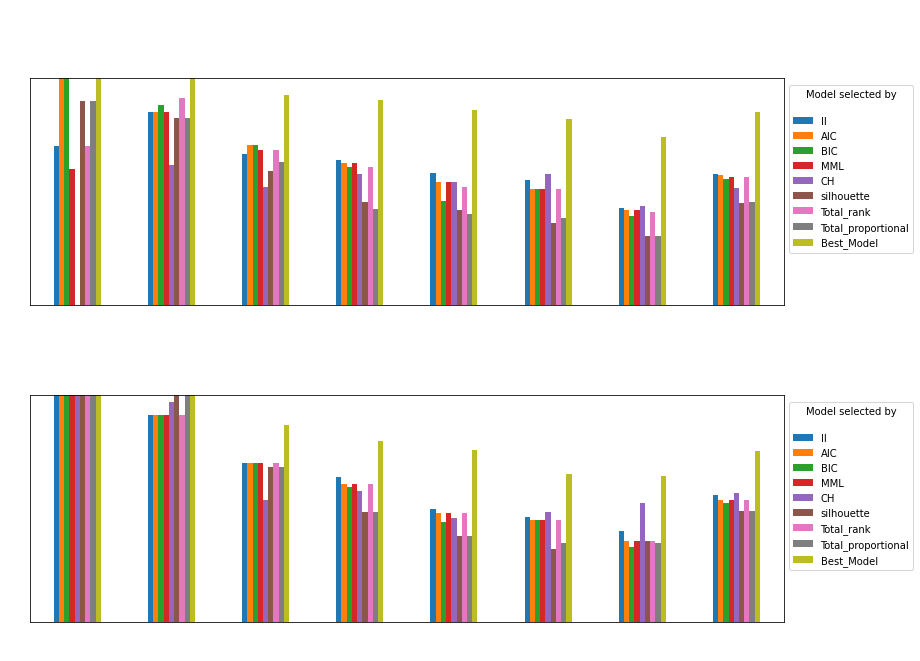

In [3]:
from plotting.mc_simulation.criteria.plot import plot_comparison_criteria
settings = {
    "sup_title_size": 25
}
fig, data = plot_comparison_criteria(df_scores, settings)
fig

In [4]:
data

,True cluster number,correctly_identified_clusters,criteria,init_routine
0,6,0.551282,ll_rank,random_inside
1,3,0.666667,ll_rank,random_inside
2,5,0.580000,ll_rank,random_inside
3,2,0.852941,ll_rank,random_inside
4,4,0.640625,ll_rank,random_inside
...,...,...,...,...
3,2,1.000000,Best_Model_,OPTICS
4,4,0.796875,Best_Model_,OPTICS
5,7,0.642857,Best_Model_,OPTICS
6,1,1.000000,Best_Model_,OPTICS


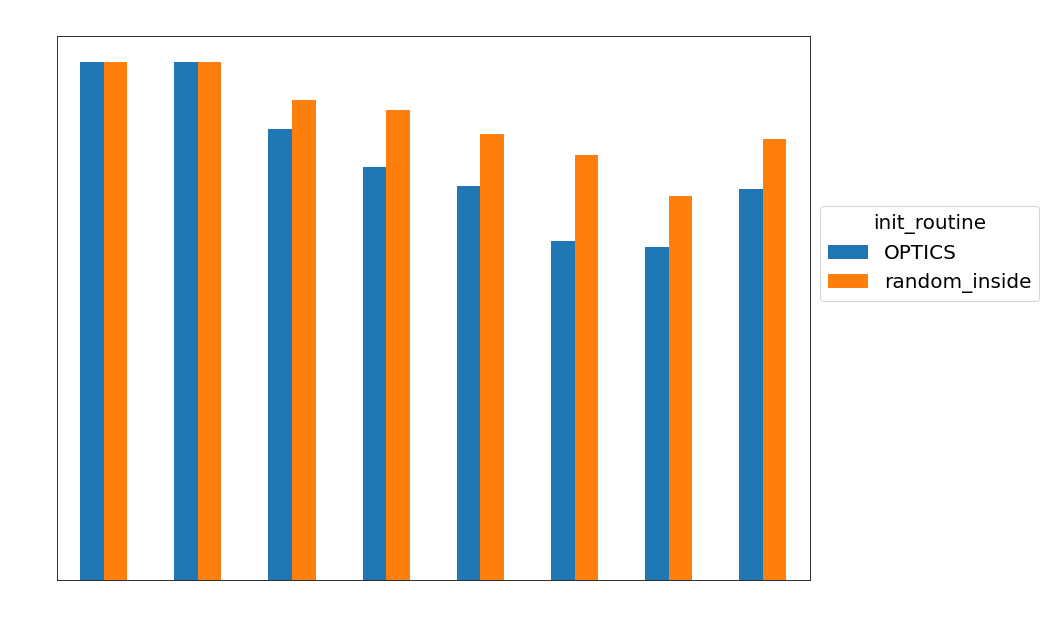

In [5]:
from plotting.mc_simulation.comparison_init_rout_best_model.plot import plot_init_routine_comparison_best_models
plot_init_routine_comparison_best_models(data)

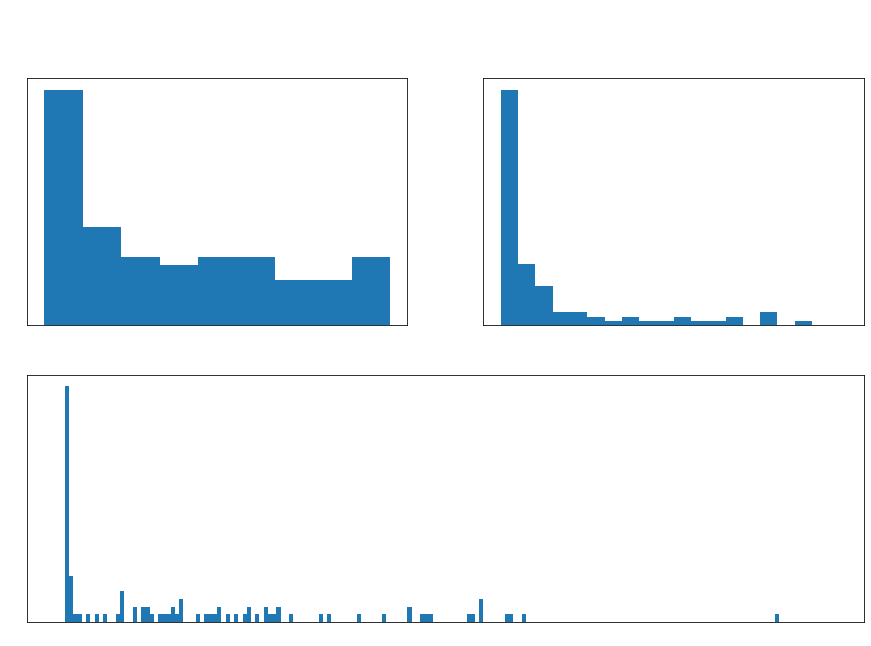

In [6]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank ="Total_rank_rank" #  "AIC_rank" #
init_routine = "random_inside"
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_scores, rank, init_routine)#)
    

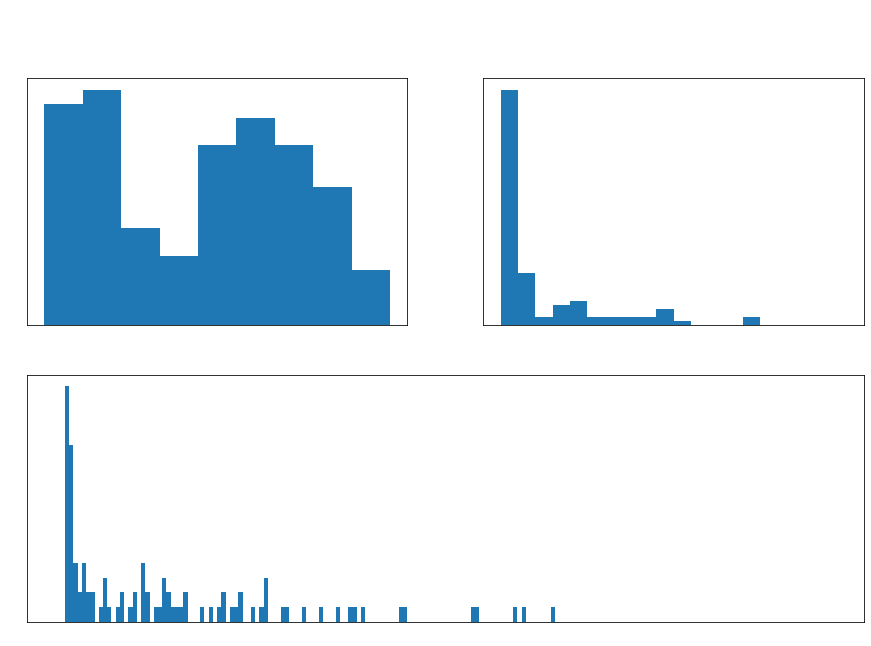

In [23]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank = "CH_rank" #"Total_rank_rank" # 
init_routine = "random_inside"
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_scores, rank, init_routine)#)

In [18]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 33
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.iloc[50:100]


best model: 6 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
6049,6049,247,14.002358,14.013362,250,109,3,33,random_inside,6,7,222.711272,-198.711272,-154.631393,-183.854835,0.332358,304.388020,0.917777,50,45,55,47,41,34,87,238,49,5.0
6001,6001,283,1.891471,1.911233,289,61,6,33,random_inside,4,7,213.272139,-197.272139,-167.885553,-184.458395,0.234701,41.616185,0.903603,62,46,28,46,59,70,130,241,50,4.0
6065,6065,73,8.115426,8.115426,73,125,0,33,random_inside,7,7,223.178388,-195.178388,-143.751862,-180.770794,0.391257,307.034320,0.926272,48,50,69,51,23,32,67,241,50,5.0
6070,6070,285,24.513298,24.606604,301,130,16,33,random_inside,7,7,218.558121,-190.558121,-139.131596,-177.948674,0.394141,301.790627,0.926633,54,54,76,54,20,37,54,258,51,5.0
6083,6083,287,27.348755,27.408120,296,143,9,33,random_inside,8,7,220.112694,-188.112694,-129.339522,-174.046793,0.412000,306.075623,0.929176,52,56,86,56,11,33,42,261,52,4.0
6062,6062,153,12.176556,12.196423,158,122,5,33,random_inside,7,7,216.299528,-188.299528,-136.873002,-174.667818,0.352319,268.417355,0.920524,56,55,78,55,39,54,85,283,53,5.0
6011,6011,41,1.246496,1.278309,51,71,10,33,random_inside,4,7,197.494780,-181.494780,-152.108194,-169.234646,0.471776,357.284837,0.937818,83,73,59,69,3,9,12,287,54,4.0
6009,6009,39,1.230314,1.251916,49,69,10,33,random_inside,4,7,197.494561,-181.494561,-152.107975,-169.234457,0.471776,357.284837,0.937818,84,74,60,70,3,9,13,291,55,4.0
6061,6061,133,13.857070,13.897157,143,121,10,33,random_inside,7,7,213.647279,-185.647279,-134.220753,-172.768785,0.387136,293.578775,0.925546,61,62,83,58,28,43,73,292,56,5.0
6063,6063,128,11.585923,11.688662,151,123,23,33,random_inside,7,7,214.076035,-186.076035,-134.649509,-172.674388,0.373160,296.503464,0.923520,59,60,80,59,35,40,79,293,57,5.0


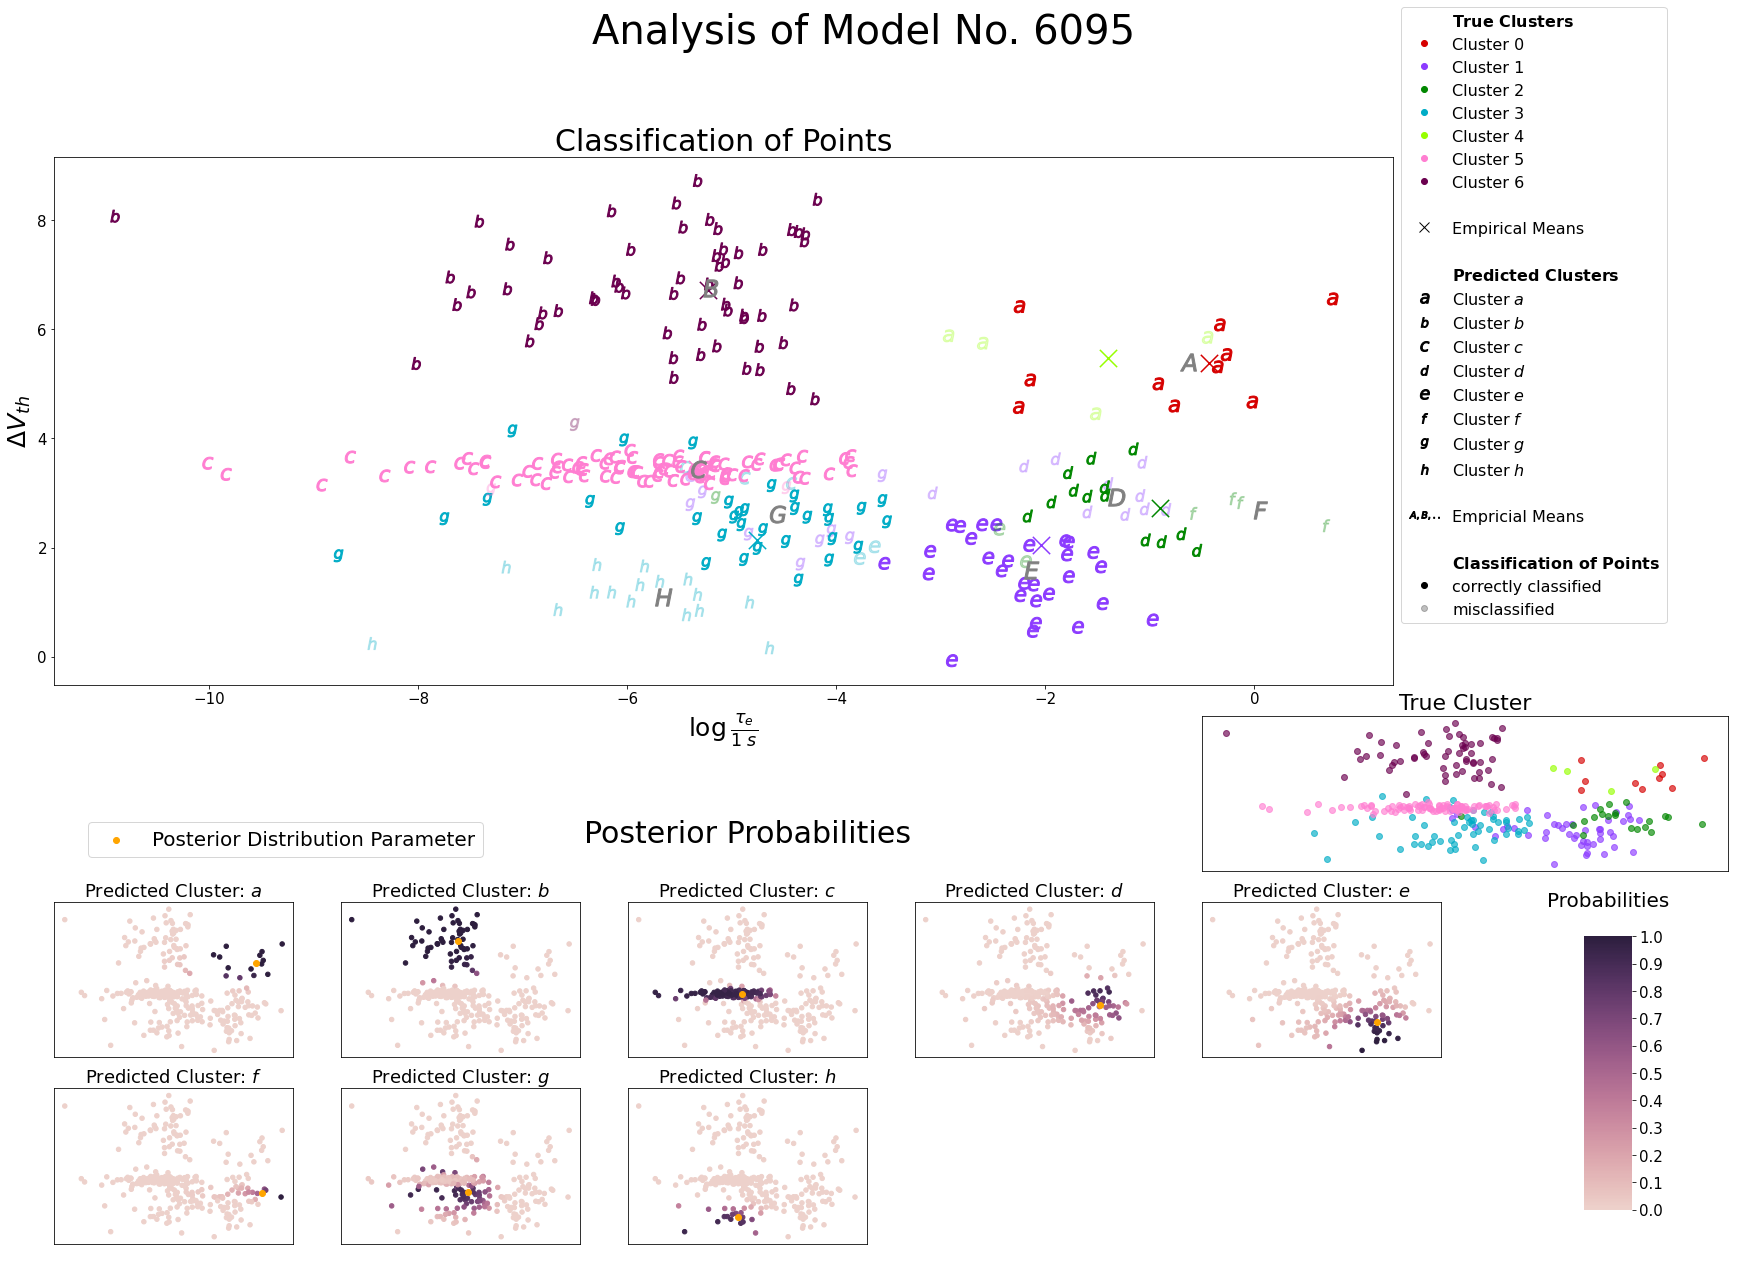

In [15]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
model_idx = 6095
#criterion = "TOTAL_rank"

plot_clustering_assessment(model_data, df_scores, model_idx)